In [1]:
%run statistics.ipynb

3.0.0
Calculating possible returns for each game...
Bust games: 80.01%
game
             chance  player_score  player_cards  player_aces  dealer_score  dealer_cards  dealer_aces   2   3   4  ...  11  drawn_1  drawn_2  drawn_3  drawn_4  drawn_5  drawn_6  drawn_7  drawn_8  drawn_9
0     1.000000e+00            12             2            0             4             1            0  24  24  23  ...  24        0        0        0        0        0        0        0        0        0
2     7.766990e-02            13             3            0             4             1            0  24  24  23  ...  23       11        0        0        0        0        0        0        0        0
3     7.766990e-02            14             3            0             4             1            0  23  24  23  ...  24        2        0        0        0        0        0        0        0        0
4     7.766990e-02            15             3            0             4             1            0  24  23  2

In [2]:
ret = get_best_return_updated(get_game(get_deck(1), [9,9], [9], update_deck=False))
ret

stand    -0.180420
hit      -0.613787
double   -1.227575
dtype: float64

In [3]:
# hand scores
dealer = np.arange(2,12)
hard = np.arange(5,22)
soft = np.arange(13,22)
pairs = np.tile(np.arange(2,12).reshape(-1,1), 2)

In [4]:
# hard hands
hard_standing = pd.DataFrame(
    np.zeros((len(hard), len(dealer))), 
    index=hard,
    columns=dealer)

hard_hitting = pd.DataFrame(
    np.zeros((len(hard), len(dealer))), 
    index=hard,
    columns=dealer)

hard_doubling = pd.DataFrame(
    np.zeros((len(hard), len(dealer))),
    index=hard,
    columns=dealer)

for dealerscore in hard_standing.columns:
    for playerscore in hard_standing.index:
        print("Dealerscore", dealerscore, "Playerscore", playerscore)
        game = get_game(None, [np.ceil(playerscore/2).astype(int), np.floor(playerscore/2).astype(int)], [dealerscore], False)
        br = get_best_return_updated(game)
        print(br)
        hard_standing.loc[playerscore, dealerscore] = br["stand"]
        hard_hitting.loc[playerscore, dealerscore] = br["hit"]
        hard_doubling.loc[playerscore, dealerscore] = br["double"]
np.maximum(hard_standing, hard_hitting, hard_doubling)

Dealerscore 2 Playerscore 5
stand    -0.293224
hit      -0.128696
double   -0.586447
dtype: float64
Dealerscore 2 Playerscore 6
stand    -0.293224
hit      -0.141081
double   -0.564983
dtype: float64
Dealerscore 2 Playerscore 7
stand    -0.293224
hit      -0.109294
double   -0.436443
dtype: float64
Dealerscore 2 Playerscore 8
stand    -0.293224
hit      -0.021522
double   -0.204719
dtype: float64
Dealerscore 2 Playerscore 9
stand    -0.293224
hit       0.074852
double    0.061414
dtype: float64
Dealerscore 2 Playerscore 10
stand    -0.293224
hit       0.182982
double    0.359793
dtype: float64
Dealerscore 2 Playerscore 11
stand    -0.293224
hit       0.239175
double    0.472260
dtype: float64
Dealerscore 2 Playerscore 12
stand    -0.293224
hit      -0.252926
double   -0.505853
dtype: float64
Dealerscore 2 Playerscore 13
stand    -0.293224
hit      -0.307923
double   -0.615845
dtype: float64
Dealerscore 2 Playerscore 14
stand    -0.293224
hit      -0.362338
double   -0.724676
dtype: flo

,2,3,4,5,6,7,8,9,10,11
5,-0.128696,-0.095423,-0.061991,-0.023885,-0.001583,-0.118735,-0.187728,-0.266406,-0.366159,-0.500882
6,-0.141081,-0.107236,-0.073344,-0.034886,-0.013600,-0.150960,-0.216592,-0.292113,-0.388355,-0.518464
7,-0.109294,-0.076427,-0.043260,-0.007255,0.028465,-0.068848,-0.210207,-0.285272,-0.371435,-0.523048
8,-0.021522,0.008528,0.038889,0.071098,0.114704,0.081679,-0.059888,-0.209190,-0.306477,-0.444195
9,0.074852,0.102022,0.129310,0.158579,0.196025,0.171295,0.097144,-0.052311,-0.217160,-0.353042
10,0.182982,0.206933,0.230907,0.257038,0.288019,0.256668,0.197207,0.115492,-0.053313,-0.250467
11,0.239175,0.261534,0.283835,0.308514,0.334503,0.291900,0.229278,0.157453,0.032254,-0.208125
12,-0.252926,-0.232388,-0.211481,-0.166926,-0.154158,-0.212781,-0.271842,-0.340410,-0.429180,-0.551601
13,-0.293224,-0.252100,-0.211481,-0.166926,-0.154158,-0.268739,-0.323633,-0.387265,-0.469782,-0.583302
14,-0.293224,-0.252100,-0.211481,-0.166926,-0.154158,-0.320779,-0.371735,-0.430876,-0.507569,-0.612871


In [5]:
hard_doubling

,2,3,4,5,6,7,8,9,10,11
5,-0.128696,-0.095423,-0.061991,-0.023885,-0.001583,-0.118735,-0.187728,-0.266406,-0.366159,-0.500882
6,-0.141081,-0.107236,-0.073344,-0.034886,-0.013600,-0.150960,-0.216592,-0.292113,-0.388355,-0.518464
7,-0.109294,-0.076427,-0.043260,-0.007255,0.028465,-0.068848,-0.210207,-0.285272,-0.371435,-0.523048
8,-0.021522,0.008528,0.038889,0.071098,0.114704,0.081679,-0.059888,-0.209190,-0.306477,-0.444195
9,0.074852,0.102022,0.129310,0.158579,0.196025,0.171295,0.097144,-0.052311,-0.217160,-0.353042
10,0.182982,0.206933,0.230907,0.257038,0.288019,0.256668,0.197207,0.115492,-0.053313,-0.250467
11,0.239175,0.261534,0.283835,0.308514,0.334503,0.291900,0.229278,0.157453,0.032254,-0.208125
12,-0.252926,-0.232388,-0.211481,-0.166926,-0.154158,-0.212781,-0.271842,-0.340410,-0.429180,-0.551601
13,-0.293224,-0.252100,-0.211481,-0.166926,-0.154158,-0.268739,-0.323633,-0.387265,-0.469782,-0.583302
14,-0.293224,-0.252100,-0.211481,-0.166926,-0.154158,-0.320779,-0.371735,-0.430876,-0.507569,-0.612871


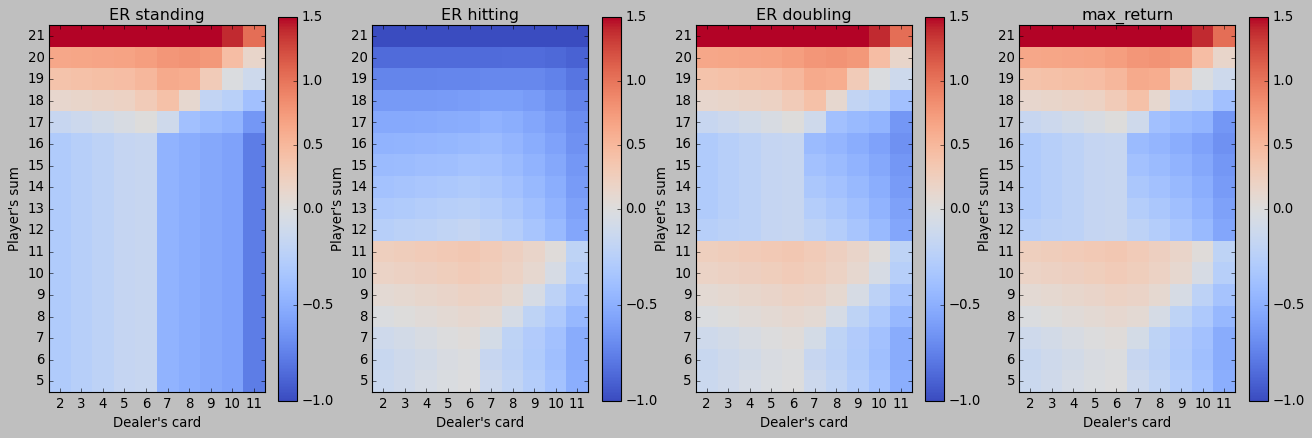

In [6]:
from matplotlib import pyplot as plt
from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-1., vcenter=0., vmax=1.5)
plt.style.use("classic")
plt.rcParams['figure.figsize'] = [20, 6]

fig, ax = plt.subplots(1,4)

hs = hard_standing.iloc[::-1,:]
hh = hard_hitting.iloc[::-1,:]
hd = hard_doubling.iloc[::-1,:]

ax[0].set_title("ER standing")
im = ax[0].imshow(hs, interpolation='nearest', cmap="coolwarm", norm=divnorm)
fig.colorbar(im, ax=ax[0])
ax[0].set_xticks(np.arange(len(hs.columns)), hs.columns)
ax[0].set_yticks(np.arange(len(hs.index)), hs.index)
ax[0].set_xlabel("Dealer's card")
ax[0].set_ylabel("Player's sum")

ax[1].set_title("ER hitting")
im = ax[1].imshow(hh, interpolation='nearest', cmap="coolwarm", norm=divnorm)
fig.colorbar(im, ax=ax[1])
ax[1].set_xticks(np.arange(len(hh.columns)), hh.columns)
ax[1].set_yticks(np.arange(len(hh.index)), hh.index)
ax[1].set_xlabel("Dealer's card")
ax[1].set_ylabel("Player's sum")

ax[2].set_title("ER doubling")
im = ax[2].imshow(hd, interpolation='nearest', cmap="coolwarm", norm=divnorm)
fig.colorbar(im, ax=ax[2])
ax[2].set_xticks(np.arange(len(hd.columns)), hd.columns)
ax[2].set_yticks(np.arange(len(hd.index)), hd.index)
ax[2].set_xlabel("Dealer's card")
ax[2].set_ylabel("Player's sum")

ax[3].set_title("max_return")
im = ax[3].imshow(np.maximum(hs.values, hh.values, hd.values), interpolation='nearest', cmap="coolwarm", norm=divnorm)
fig.colorbar(im, ax=ax[3])
ax[3].set_xticks(np.arange(len(hs.columns)), hs.columns)
ax[3].set_yticks(np.arange(len(hs.index)), hs.index)
ax[3].set_xlabel("Dealer's card")
ax[3].set_ylabel("Player's sum")

a = 1


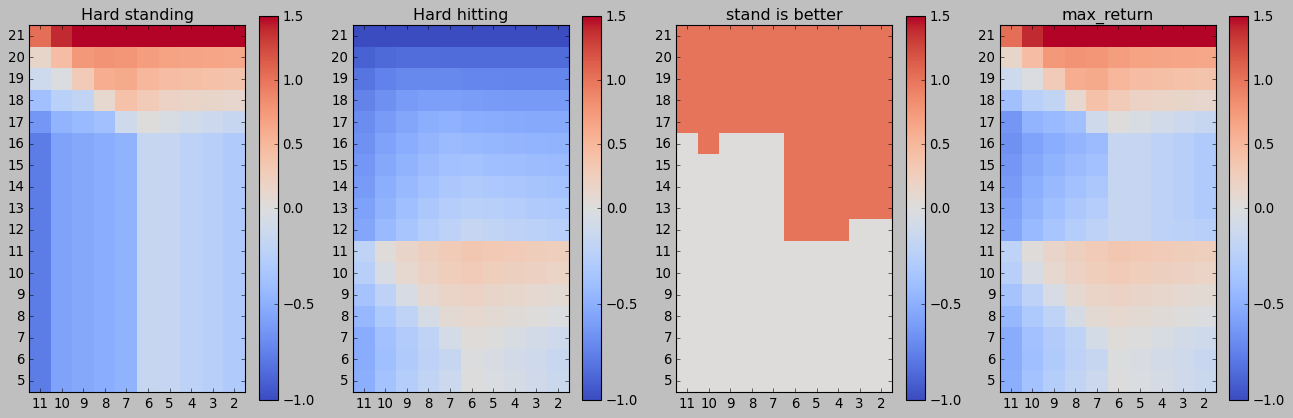

### ISSUES:
- player = 16 and dealer = 10 should be hit
- maybe works with less decks? or more decks?

In [7]:
# hard hands
hard_hitting = pd.DataFrame(
    np.zeros((len(hard), len(dealer))), 
    index=hard,
    columns=dealer)
for dealerscore in hard_hitting.columns:
    print("Dealerscore", dealerscore)
    for playerscore in hard_hitting.index:
        game = get_game(deck, [2, playerscore-2], [dealerscore], False)
        hard_hitting.loc[playerscore, dealerscore] = get_return_chances_hitting_once(game)["expected_return"]
hard_hitting

Dealerscore 2


NameError: name 'deck' is not defined

In [ ]:
hard_standing-hard_hitting

,2,3,4,5,6,7,8,9,10
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
